In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd

In [2]:
file_name = 'CH4 954 ppm raw/00'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(1,100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x           y0          y1        y2          y3
0            0  820507000.0 -14444500.0 -227840.0 -13735900.0
1            1  859676000.0  -6947580.0 -219392.0 -12532000.0
2            2  833578000.0    829952.0 -211968.0 -13924400.0
3            3  905413000.0   8641790.0 -206080.0 -16608000.0
4            4  806905000.0  15951100.0 -196608.0 -16278500.0
...        ...          ...         ...       ...         ...
9599995  95995  702471000.0 -23103000.0 -188928.0 -11244300.0
9599996  95996  786943000.0 -16965100.0 -192512.0 -13622000.0
9599997  95997  834429000.0  -9716480.0 -176128.0 -12947500.0
9599998  95998  827305000.0  -1933570.0 -163840.0 -12815100.0
9599999  95999  863073000.0   5976830.0 -177408.0 -15446000.0

[9600000 rows x 5 columns]


In [3]:
print(df_01.y0.iloc[:9_600_000].mean())
print(df_01.y0.iloc[:9_600_000].max())
print(df_01.y0.iloc[:9_600_000].min())

326396.836213125
1041970000.0
-1550060000.0


In [4]:
# Size_pyro = 9_600_000
Size_pyro = 9_600_000

sst_pyro  = df_01.y0.iloc[:Size_pyro]
df_01.x = df_01.index
time = df_01.x.iloc[:Size_pyro]

dt = 1.0/48_000

# wavelet = 'gaus1'
# max_scale = 5.65
# min_scale = 5.25

# wavelet = 'mexh'
# max_scale = 6.9
# min_scale = 6.5


# wavelet = 'gaus3'
# max_scale = 11.2
# min_scale = 10.5


# wavelet = 'gaus4'
# max_scale = 14.1
# min_scale = 13



# wavelet = 'cgau2'
# max_scale = 11.3
# min_scale = 10.3


# wavelet = 'cmor1-1792'
# max_scale = 48
# min_scale = 45.5

wavelet = 'cmor10-1792'
max_scale = 50
min_scale = 45




# wavelet = 'morl'
# max_scale = 23
# min_scale = 21



scales = np.arange(min_scale, max_scale, 0.05)

slase = 95750
size_shape = 500

delta_time = 48000
interval = int(Size_pyro/delta_time)

In [209]:
[cfs_pyro, frequencies] = pywt.cwt(sst_pyro, scales, wavelet, dt)


period = 1.0/frequencies

print(frequencies)

# print(len(cfs_pyro))
# print(len(cfs_pyro[0]))

[1866.66666667 1864.59489456 1862.52771619 1860.46511628 1858.40707965
 1856.35359116 1854.30463576 1852.26019846 1850.22026432 1848.18481848
 1846.15384615 1844.1273326  1842.10526316 1840.08762322 1838.07439825
 1836.06557377 1834.06113537 1832.0610687  1830.06535948 1828.07399347
 1826.08695652 1824.10423453 1822.12581345 1820.15167931 1818.18181818
 1816.21621622 1814.25485961 1812.29773463 1810.34482759 1808.39612487
 1806.4516129  1804.5112782  1802.5751073  1800.64308682 1798.71520343
 1796.79144385 1794.87179487 1792.95624333 1791.04477612 1789.13738019
 1787.23404255 1785.33475027 1783.43949045 1781.54825027 1779.66101695
 1777.77777778 1775.89852008 1774.02323126 1772.15189873 1770.28451001
 1768.42105263 1766.5615142  1764.70588235 1762.85414481 1761.00628931
 1759.16230366 1757.32217573 1755.48589342 1753.65344468 1751.82481752
 1750.         1748.17898023 1746.36174636 1744.5482866  1742.73858921
 1740.93264249 1739.13043478 1737.3319545  1735.53719008 1733.74613003
 1731.

In [210]:
cfs_pyro = np.abs(cfs_pyro)

cfs_pyro_shape = np.array([cfs_pyro[i-1][slase:slase+size_shape] for i in range(len(scales))])


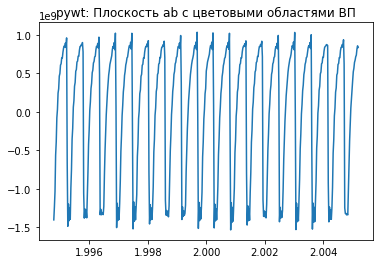

In [211]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, frequencies)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape])

plt.show()

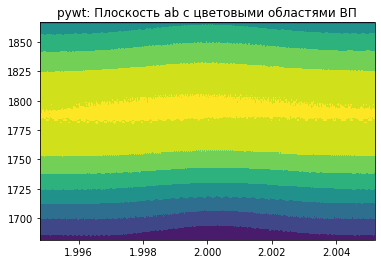

In [212]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_pyro_shape)), 10)
plt.contourf(A_scales, B_time,cfs_pyro_shape, extend='both')
plt.show()

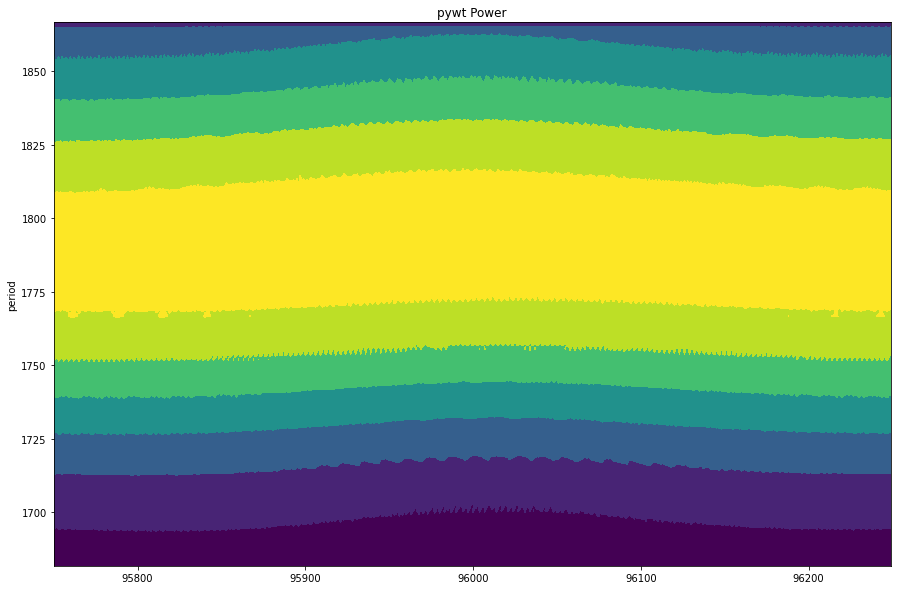

In [213]:
# power_pyro = (abs(cfs_pyro)) ** 2
# print(type(cfs_pyro))
# print(type(cfs_pyro_shape))
power_pyro_shape = (cfs_pyro_shape)**2

# # levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], frequencies, power_pyro_shape, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

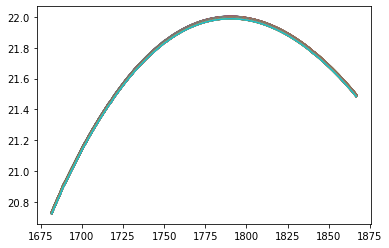

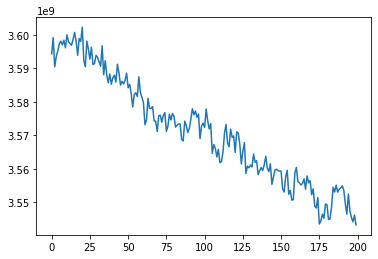

In [214]:
# power_pyro_tr = power_pyro.transpose()
power_pyro_tr = cfs_pyro.transpose()


# Amp_pyro = zeros((interval))
mean_pyro_scales = np.zeros((interval,int(len(scales))))


plt.figure('max_Amp')

Max_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    temp_pyro = power_pyro_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_scales[j][i-1] = temp_pyro[i-1].mean()
    plt.plot(frequencies, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     print(frequencies[mean_pyro_scales[j].argmax()])
plt.show()


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()

In [215]:
from pathlib import Path  

df_mean_pyro_scales = pd.DataFrame(mean_pyro_scales)
df_mean_pyro_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor10_1792_pyro_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_pyro_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)



                                              !!!KERNEL FALLED!!!

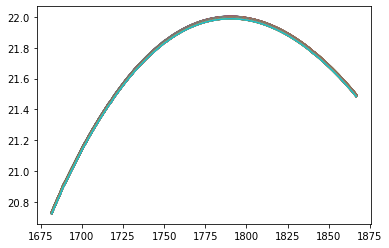

1791.0447761194073


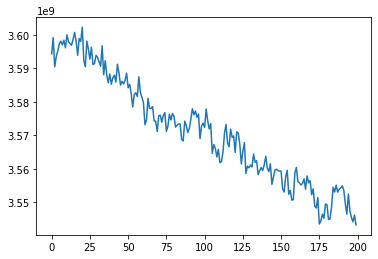

In [6]:
file_name_pyro = 'wt_raw/cmor10_1792_pyro_954.csv'
df_pyro_Amp = pd.read_csv(file_name_pyro) 
df_pyro_Amp = df_pyro_Amp.drop('Unnamed: 0', axis = 1)


mean_pyro_scales = df_pyro_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_pyro_Amp.columns)])

frequencies = 1.0/period

plt.figure('max_Amp')
    
Max_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     print(1.0/period[mean_pyro_scales[j].argmax()])
plt.show()

print(1.0/period[mean_pyro_scales[1].argmax()])


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()    

In [7]:
sst_oad  = df_01.y1.iloc[:Size_pyro]

[cfs_oad, frequencies] = pywt.cwt(sst_oad, scales, wavelet, dt)

period = 1.0/frequencies


In [8]:
cfs_oad = np.abs(cfs_oad)
cfs_oad_shape = np.array([cfs_oad[i-1][slase:slase+size_shape] for i in range(len(scales))])

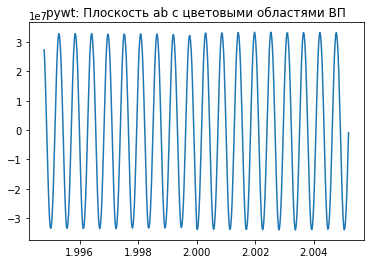

In [9]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape])

plt.show()

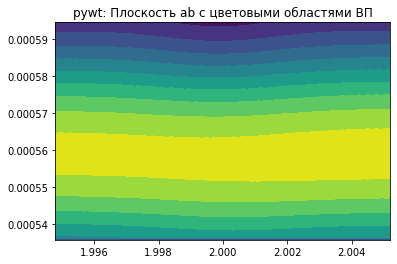

In [10]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
plt.show()

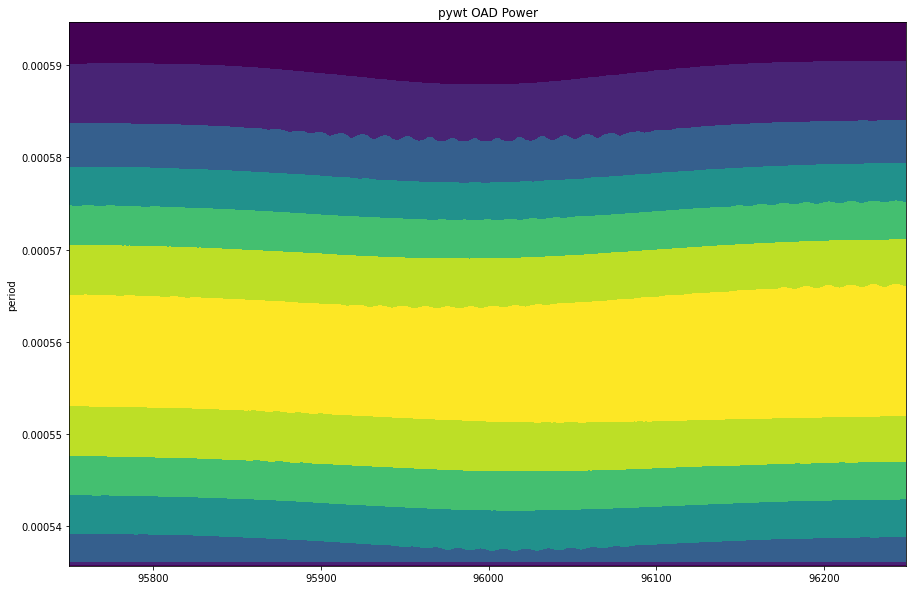

In [11]:
power_oad_shape = (cfs_oad_shape)**2


period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')

ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()

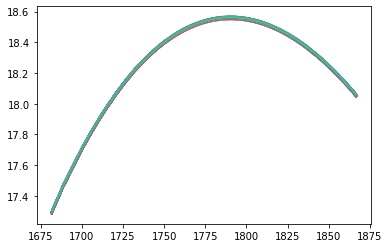

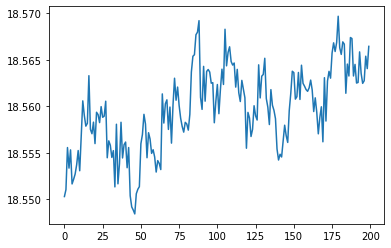

In [12]:
# power_oad_tr = power_oad.transpose()
power_oad_tr = cfs_oad.transpose()
# Amp_oad = zeros((interval))


mean_oad_scales = np.zeros((interval,int(len(scales))))

Max_oad_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad = power_oad_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_scales[j][i-1] = temp_oad[i-1].mean()
    plt.plot(frequencies, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     print(frequencies[mean_oad_scales[j].argmax()])
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_oad_amp_scales))
plt.show()

In [13]:
from pathlib import Path  

df_mean_oad_scales = pd.DataFrame(mean_oad_scales)
df_mean_oad_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor10_1792_oad_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_oad_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

                                            !!! KERNEL FALLED !!!

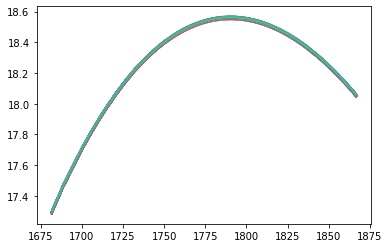

1791.0447761194073


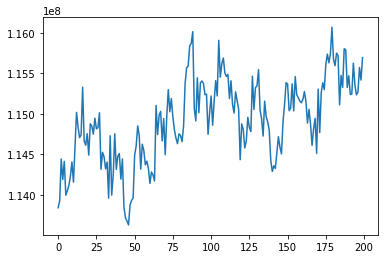

In [14]:
file_name_oad = 'wt_raw/cmor10_1792_oad_954.csv'
df_oad_Amp = pd.read_csv(file_name_oad) 
df_oad_Amp = df_oad_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_scales = df_oad_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_oad_Amp.columns)])

plt.figure('max_Amp')
    
Max_oad_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_oad_scales[1]))
print(1.0/period[mean_oad_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_oad_amp_scales)
plt.show()    



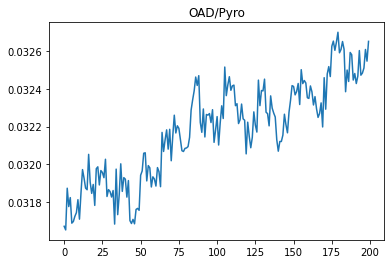

In [15]:
S_wavelet = Max_oad_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_wavelet)
plt.show()

In [16]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1700
max_freq = 1850

max_intensity_OAD = np.zeros(200)
max_index_OAD = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

for i in range(100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

    Pyro = df.y0.values[0:SAMPLE_RATE]
    OAD = df.y1.values[0:SAMPLE_RATE]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[2*i] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*i] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df.y0.values[SAMPLE_RATE:]
    OAD = df.y1.values[SAMPLE_RATE:]
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)
    max_intensity_OAD[2*i+1] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*i+1] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])

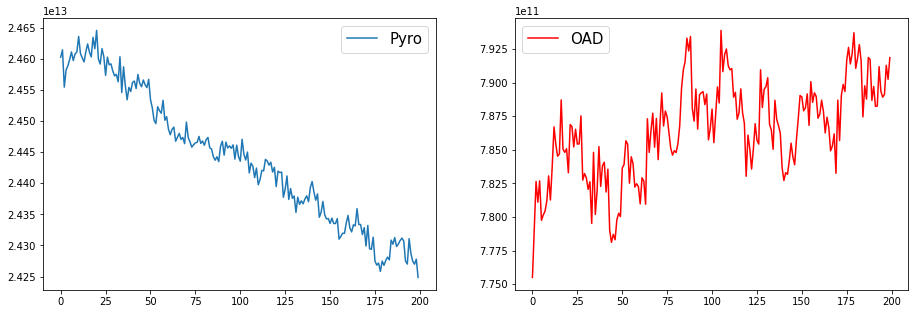

In [17]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD, 'red', label='OAD')
ax2.legend(prop={'size': 15})



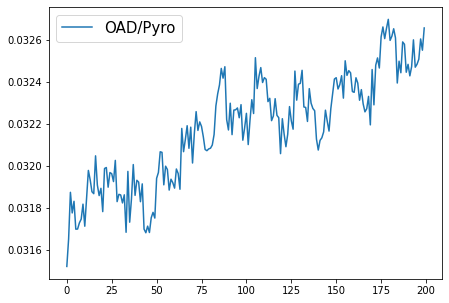

In [18]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

# print(S_fourier.std()/S_fourier.mean())


# from scipy.optimize import curve_fit

# def func_theory(x, A, B):
#     return A + B*x


# x = np.arange(200)

# popt, pcov = curve_fit(func_theory, x, S_fourier)

# A_opt,B_opt = popt

# print(B_opt/S_fourier.mean()*100)


# d_S_f = S_fourier - func_theory(x,A_opt,B_opt)
# print(d_S_f.std()/S_fourier.mean()*100)




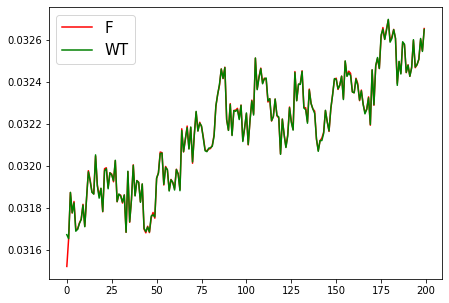

In [19]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.legend(prop={'size': 15})

In [20]:
print(S_fourier.std()-S_wavelet.std())
print(S_fourier.std()/S_fourier.mean(), S_wavelet.std()/S_wavelet.mean())
print((S_fourier - S_wavelet).mean())
print((S_fourier - S_wavelet).mean()/S_fourier.mean()*100)

1.704949219753359e-06
0.008127999736340078 0.008075144977081719
5.229634874213268e-07
0.0016252533185348939


           x            y0          y1      y2          y3
0          0  5.274840e+08 -32779000.0 -171264   3549180.0
1          1  5.807320e+08 -33825000.0 -168960   2942720.0
2          2  6.446870e+08 -33116200.0 -170752  -1469440.0
3          3  6.795840e+08 -30837800.0 -154368  -8977410.0
4          4  7.147930e+08 -27103200.0 -172032 -10121500.0
...      ...           ...         ...     ...         ...
95995  95995 -1.380270e+09  33084200.0 -185856   1310720.0
95996  95996 -1.274260e+09  31452200.0 -173568   6033410.0
95997  95997 -1.363920e+09  28560400.0 -172288  10329300.0
95998  95998 -1.293970e+09  24231900.0 -174336   8512260.0
95999  95999 -1.089390e+09  18398200.0 -167680  16976400.0

[96000 rows x 5 columns]


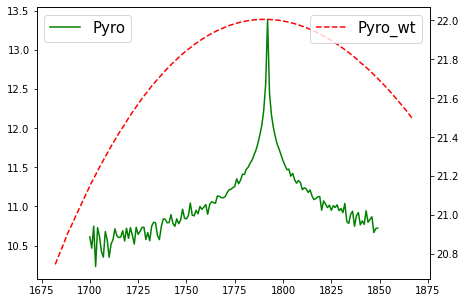

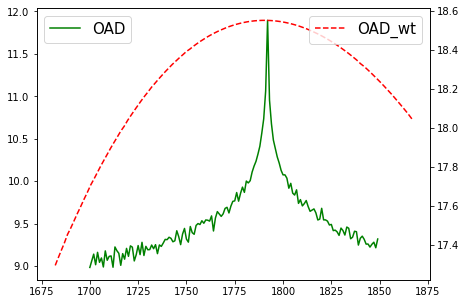

In [21]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df1)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df1.y1.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')





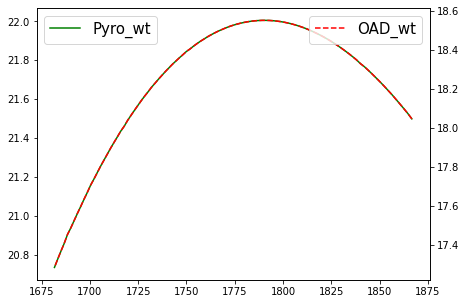

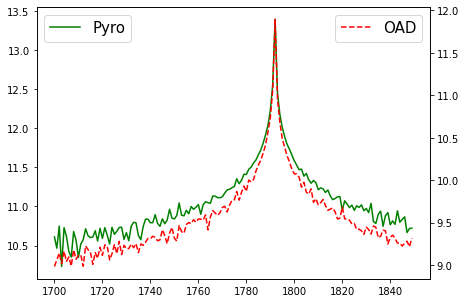

In [22]:
fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='green', label = 'Pyro_wt')
ax2.plot(1.0 / period, np.log(mean_oad_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')




fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='red', linestyle='--', label = 'OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

                                                NOISE OAD

In [41]:
print(df_01.y1.iloc[:Size_pyro].mean())
print(df_01.y1.iloc[:Size_pyro].std())

noise_oad = np.random.normal(0, 10 * df_01.y1.iloc[:9_600_000].std(), size = Size_pyro)
df_01['oad_noise'] = df_01.y1 + noise_oad

-362936.39139625
23816573.175047703


In [42]:
sst_oad_noise  = df_01.oad_noise.iloc[:Size_pyro]

[cfs_oad_noise, frequencies] = pywt.cwt(sst_oad_noise, scales, wavelet, dt)

period = 1.0/frequencies

In [ ]:
cfs_oad_noise = np.abs(cfs_oad_noise)
cfs_oad_shape_noise = np.array([cfs_oad_noise[i-1][slase:slase+size_shape] for i in range(len(scales))])

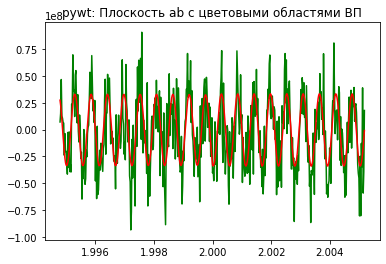

In [26]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_oad_noise[slase:slase+size_shape], color = 'green')
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape], color = 'red')
plt.show()

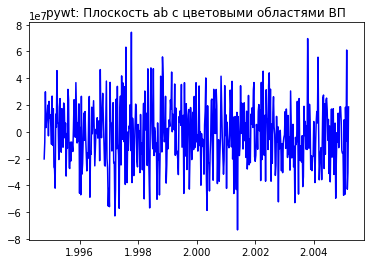

In [27]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_oad_noise[slase:slase+size_shape] - sst_oad[slase:slase+size_shape],
         color = 'blue')

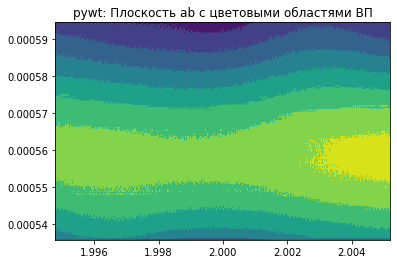

In [28]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape_noise, 10)
plt.show()

# plt.figure('pywt: 2D-график для z = w (a,b)')
# plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# # plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
# plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
# plt.show()


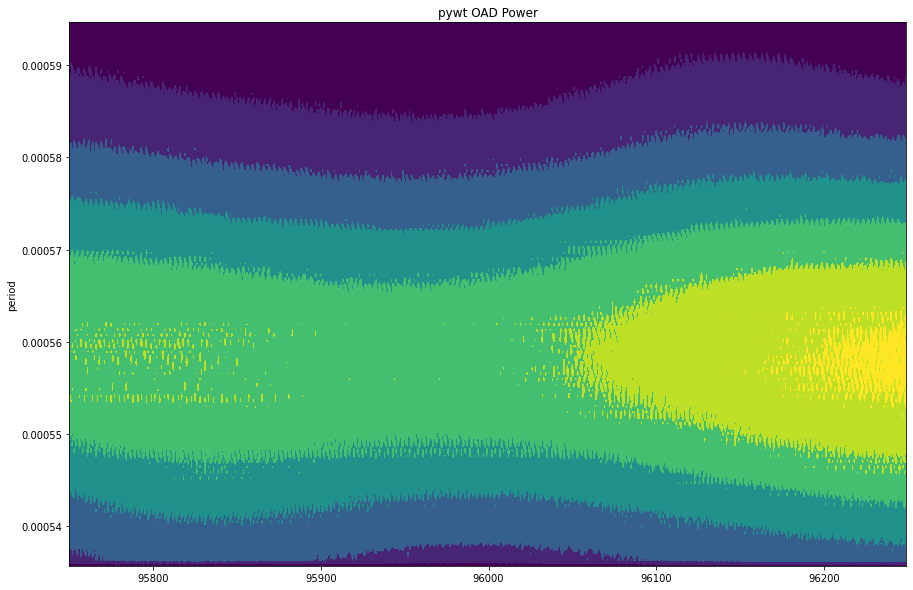

In [29]:
power_oad_shape_noise = (cfs_oad_shape_noise)**2

period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]

f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape_noise, extend='both')
ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()


# f, ax = plt.subplots(figsize=(15, 10))
# ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')
# ax.set_title("pywt OAD Power")
# ax.set_ylabel('period')
# plt.show()

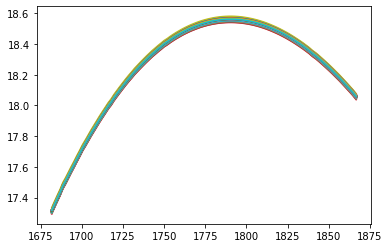

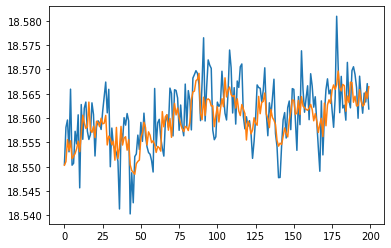

In [30]:
# power_oad_tr = power_oad.transpose()
power_oad_noise_tr = cfs_oad_noise.transpose()
# Amp_oad = zeros((interval))


mean_oad_noise_scales = np.zeros((interval,int(len(scales))))

Max_oad_noise_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad_noise = power_oad_noise_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_noise_scales[j][i-1] = temp_oad_noise[i-1].mean()
    plt.plot(frequencies, np.log(mean_oad_noise_scales[j]))
    Max_oad_noise_amp_scales[j] = mean_oad_noise_scales[j].max()
#     print(frequencies[mean_oad_scales[j].argmax()])
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_oad_noise_amp_scales))
plt.plot(np.log(Max_oad_amp_scales))

plt.show()

In [32]:
from pathlib import Path  

df_mean_oad_noise_scales = pd.DataFrame(mean_oad_noise_scales)
df_mean_oad_noise_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor10_1792_oad_noise1_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_oad_noise_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

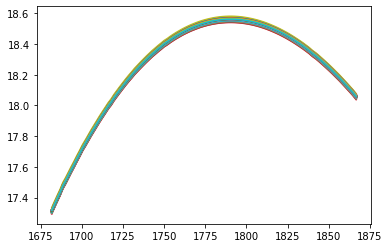

1791.0447761194073


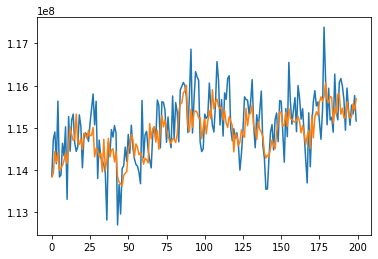

In [33]:
file_name_oad_noise = 'wt_raw/cmor10_1792_oad_noise1_954.csv'
df_oad_noise_Amp = pd.read_csv(file_name_oad_noise) 
df_oad_noise_Amp = df_oad_noise_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_noise_scales = df_oad_noise_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_oad_noise_Amp.columns)])

plt.figure('max_Amp')
    
Max_oad_noise_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_oad_noise_scales[j]))
    Max_oad_noise_amp_scales[j] = mean_oad_noise_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_oad_scales[1]))
print(1.0/period[mean_oad_noise_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_oad_noise_amp_scales)
plt.plot(Max_oad_amp_scales)
plt.show()    

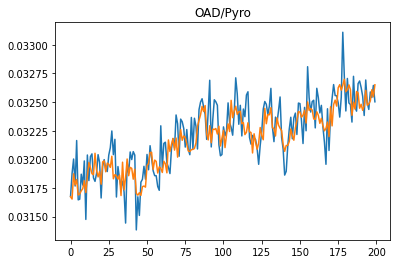

In [34]:
S_noise_wavelet = Max_oad_noise_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_noise_wavelet)
plt.plot(S_wavelet)
plt.show()

In [35]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1700
max_freq = 1850

max_intensity_OAD_noise = np.zeros(200)
max_index_OAD_noise = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

for i in range(100):
    Pyro = df_01.y0.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_noise_f = rfft(OAD_noise)

    max_intensity_OAD_noise[2*i] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df_01.y0.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    Pyro_f = rfft(Pyro)
    OAD_noise_f = rfft(OAD_noise)
    max_intensity_OAD_noise[2*i+1] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i+1] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])

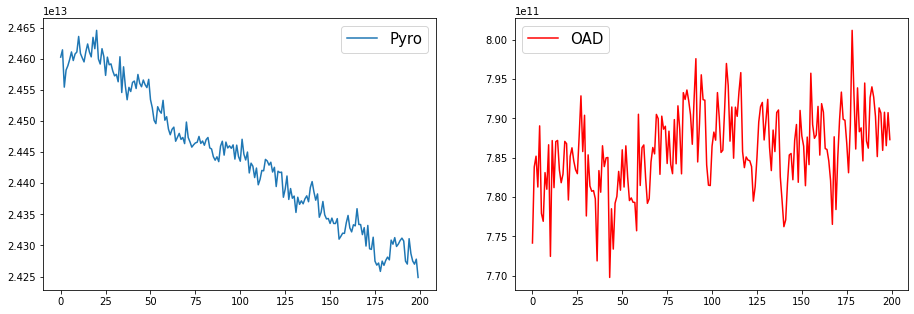

In [36]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD_noise, 'red', label='OAD')
ax2.legend(prop={'size': 15})



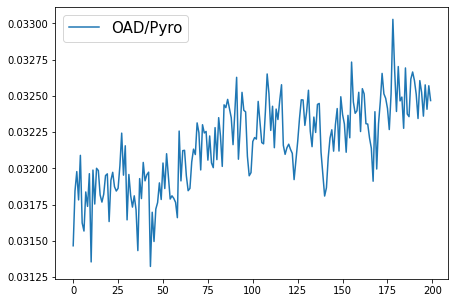

In [37]:
S_fourier_noise = max_intensity_OAD_noise/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

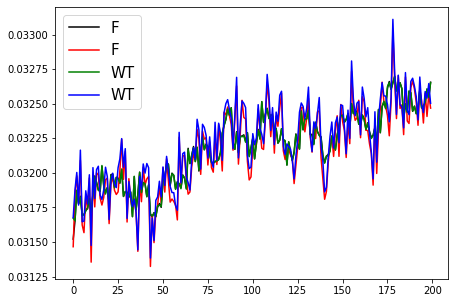

In [38]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'black')
ax1.plot([i for i in range(200)],S_fourier_noise, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.plot([i for i in range(200)],S_noise_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

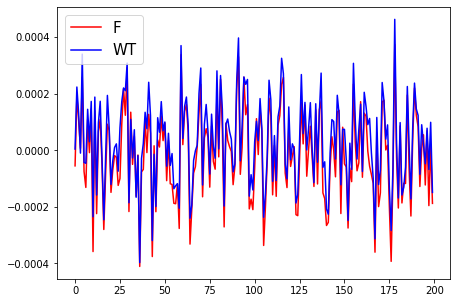

In [39]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise - S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_noise_wavelet - S_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

In [40]:
print((S_fourier_noise - S_fourier).mean())
print((S_fourier_noise - S_fourier).std())
print((S_noise_wavelet - S_wavelet).mean())
print((S_noise_wavelet - S_wavelet).std())


-1.4390703570204451e-05
0.0001540474919347051
3.4738651304248894e-05
0.00015131541736309594
